## Student’s t-Test and ANOVA (Python Code)

### Independent Student’s t-Test

In [15]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

def independent_ttest(data1, data2, alpha=0.05):
    """
    Student's t-test for independent groups
    
    Argument:
        data1: First group data in numpy array format
        data2: Second group two data in numpy array format
        alpha: Significance level
    
    Returns:
        t_stat: Computed t-statistic
        df: Degrees of freedom
        cv: Critical value
        p: p-value (of NULL hypothesis)
    """

    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
# calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

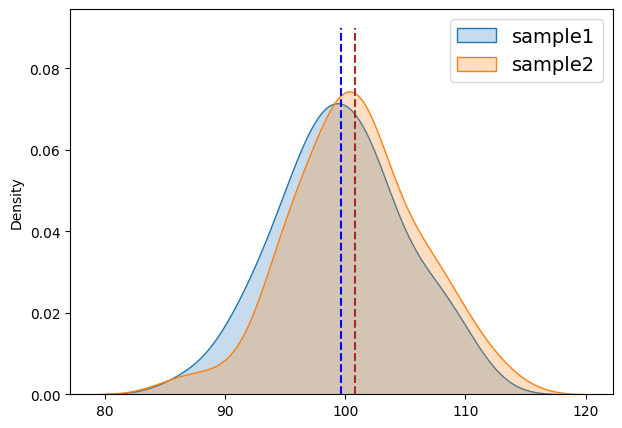

In [16]:
n_sample = 50
sample1 = 5 * np.random.randn(n_sample) + 100
sample2 = 5 * np.random.randn(n_sample) + 101
plt.figure(figsize=(7,5))
sns.kdeplot(sample1,shade=True)
sns.kdeplot(sample2,shade=True)
plt.legend(['sample1','sample2'],fontsize=14)
plt.vlines(x=sample1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=sample2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [3]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(sample1, sample2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-0.174, df=98, cv=1.661, p=0.862

Fail to reject null hypothesis that the means are equal.
Fail to reject null hypothesis that the means are equal.


### The More Sample Size is, the More Statistical Power

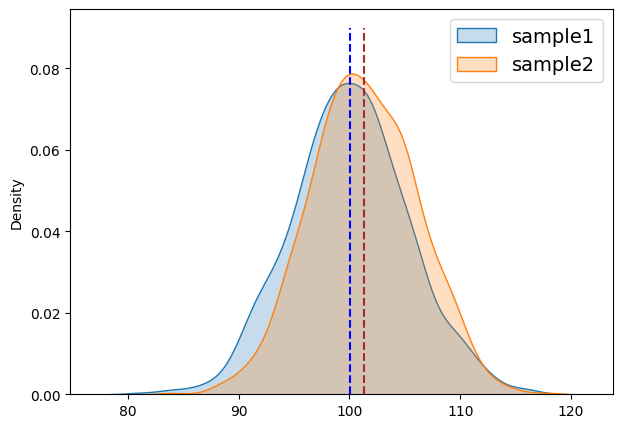

In [4]:
n_sample = 1000
sample1 = 5 * np.random.randn(n_sample) + 100
sample2 = 5 * np.random.randn(n_sample) + 101
plt.figure(figsize=(7,5))
sns.kdeplot(sample1,shade=True)
sns.kdeplot(sample2,shade=True)
plt.legend(['sample1','sample2'],fontsize=14)
plt.vlines(x=sample1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=sample2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [5]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(sample1, sample2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-5.529, df=1998, cv=1.646, p=0.000

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


### Analysis of Variance (ANOVA)

In [6]:
# ANOVA is a collection of statistical models and associated estimation procedures (such as the “variation” among and 
# between groups) used to analyze the differences among means.

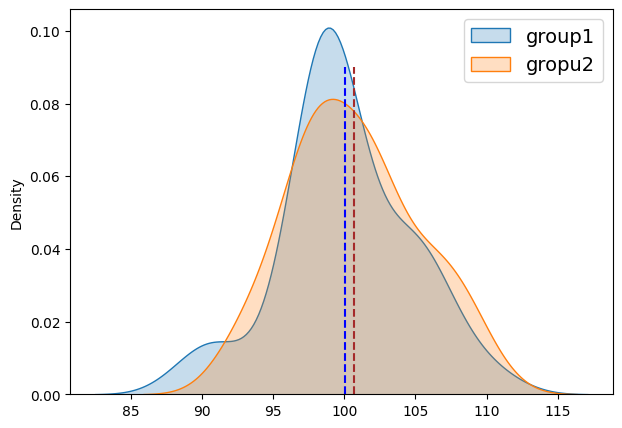

In [7]:
n_sample = 50
group1 = 5 * np.random.randn(n_sample) + 100
group2 = 5 * np.random.randn(n_sample) + 101
plt.figure(figsize=(7,5))
sns.kdeplot(group1,shade=True)
sns.kdeplot(group2,shade=True)
plt.legend(['group1','gropu2'],fontsize=14)
plt.vlines(x=group1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=group2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

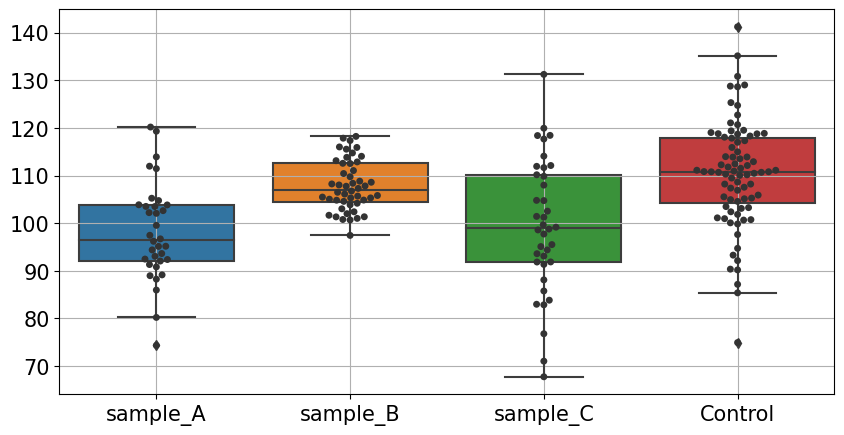

In [11]:
sample_A = 9*np.random.randn(34) + 101
sample_B = 6*np.random.randn(48) + 109
sample_C = 12*np.random.randn(38) + 103
Control  = 10*np.random.randn(80) + 110
plt.figure(figsize=(10,5))
ax=sns.boxplot(data=[sample_A,sample_B,sample_C,Control])
ax=sns.swarmplot(data=[sample_A,sample_B,sample_C,Control],color='.2')
ax.set_xticklabels(['sample_A','sample_B','sample_C','Control'],fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [9]:
f,p=st.f_oneway(group1,group2)
print("The F-statistic obtained running ANOVA on the data groups:",f)
print("The p-value of the ANOVA test:",p)
if p>0.05:
    print("\nANOVA fails to reject the hypothesis of equal mean")
else:
    print("\nWe reject the hypothesis of equal mean as per ANOVA test result")

The F-statistic obtained running ANOVA on the data groups: 0.47257750740194693
The p-value of the ANOVA test: 0.49342751538437624

ANOVA fails to reject the hypothesis of equal mean


sample_A = 9*np.random.randn(34) + 101
sample_B = 6*np.random.randn(48) + 109
sample_C = 12*np.random.randn(38) + 103
Control  = 10*np.random.randn(80) + 110
plt.figure(figsize=(10,5))
ax=sns.boxplot(data=[sample_A,sample_B,sample_C,Control])
ax=sns.swarmplot(data=[sample_A,sample_B,sample_C,Control],color='.2')
ax.set_xticklabels(['sample_A','sample_B','sample_C','Control'],fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

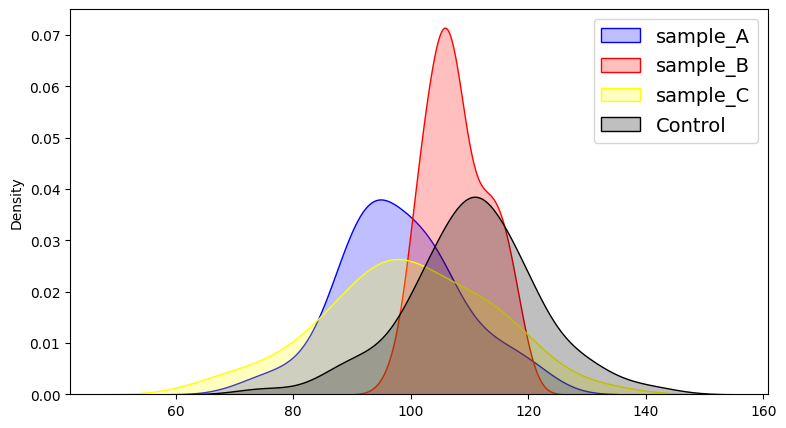

In [12]:
plt.figure(figsize=(9,5))
sns.kdeplot(sample_A,shade=True,color='Blue')
sns.kdeplot(sample_B,shade=True,color='red')
sns.kdeplot(sample_C,shade=True,color='yellow')
sns.kdeplot(Control,shade=True,color='black')
plt.legend(['sample_A','sample_B','sample_C','Control'],fontsize=14)
plt.show()

In [13]:
from itertools import combinations
def multi_anova(groups, alpha=0.05):
    """
    Two-way ANOVA between multiple groups
    groups: A dictionary object of trial groups
    """
    list_anova = list(combinations(list(groups.keys()),2))
    
    for comb in list_anova:
        _,p=st.f_oneway(groups[comb[0]],groups[comb[1]])
        if p>0.05:
            print("\nANOVA fails to reject the hypothesis of equal mean for {} and {}".format(comb[0],comb[1]))
        else:
            print("\nWe reject the hypothesis of equal mean for {} and {} as per ANOVA test result".format(comb[0],comb[1]))

In [14]:
# And now we can apply the two-way pair comparison:

groups = {'A':sample_A,'B':sample_B,'C':sample_C,'Control':Control}
multi_anova(groups)


We reject the hypothesis of equal mean for A and B as per ANOVA test result

ANOVA fails to reject the hypothesis of equal mean for A and C

We reject the hypothesis of equal mean for A and Control as per ANOVA test result

We reject the hypothesis of equal mean for B and C as per ANOVA test result

ANOVA fails to reject the hypothesis of equal mean for B and Control

We reject the hypothesis of equal mean for C and Control as per ANOVA test result
